<a href="https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp?scriptVersionId=163979220" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Настоящий файл устарел!!!

Новая версия находится по адресу https://www.kaggle.com/code/eavprog/abscur2

---

# Рейтинг голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа

ДОБРО ПОЖАЛОВАТЬ НА СТРАНИЦУ РЕЙТИНГОВ ГОЛУБЫХ ФИШЕК МОСКОВСКОЙ БИРЖИ ПО АБСОЛЮТНЫМ КУРСАМ И КОЭФФИЦИЕНТУ ШАРПА

Мы рады приветствовать вас на странице, посвященной рейтингам голубых фишек Московской биржи по абсолютным курсам и коэффициенту Шарпа. Наша страница предоставляет вам уникальную возможность оценить доходность 20 выбранных бумаг из списка "голубых фишек" Мосбиржи на различных временных промежутках.

На странице представлены рейтинги для каждого периода, включая месяц, квартал, полгода, год, 2 года, 3 года и 5 лет. Для удобства анализа мы использовали столбчатые диаграммы, отображающие коэффициент Шарпа абсолютного курса бумаг. Бумаги отсортированы по убыванию коэффициента Шарпа, что позволяет вам быстро определить самые выгодные и невыгодные акции. По горизонтальной оси диаграмм вы найдете коды бумаг, чтобы легко идентифицировать каждую из них. 

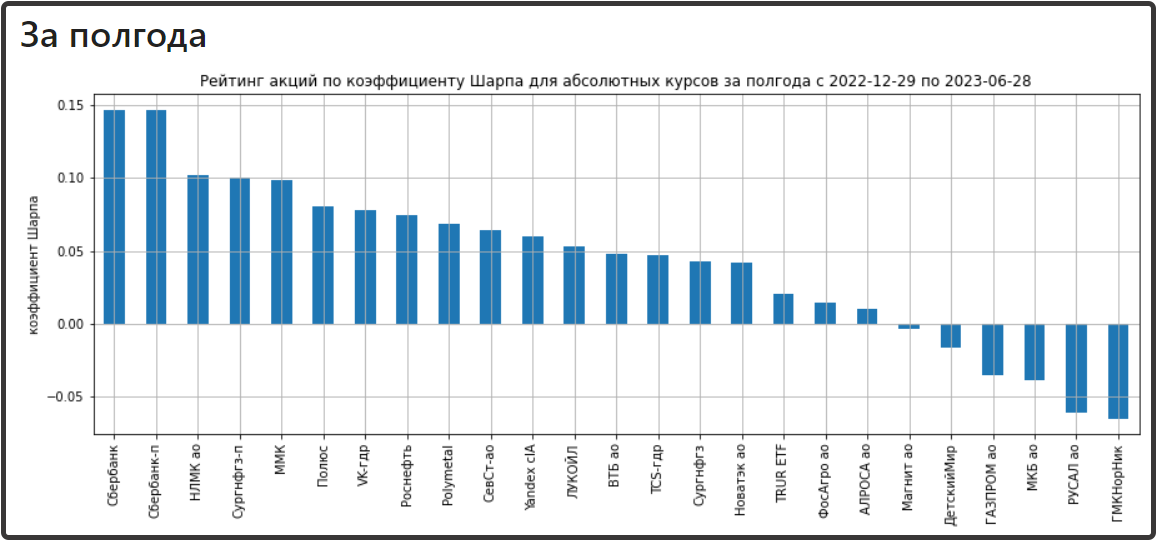

Коэффициент Шарпа считается как отношение средней дневной доходнсти к стандартному отклонению этой средней дневной доходности.

$$
coefSharp = \frac{mean(\frac{A_{i+1}-A_i}{A_i},i=start...end)}{std(\frac{A_{i+1}-A_i}{A_i},i=start...end)}
$$

Под графиками рейтингов мы предоставляем таблицу, содержащую информацию о самых выгодных и невыгодных бумагах с высоким и низким коэффициентом Шарпа соответственно. В таблице вы найдете коды бумаг, их категории и соответствующие коэффициенты Шарпа. Кроме того, мы предоставляем ссылки на страницы с графиками истории абсолютного и рублевого курса каждой из этих бумаг, что позволяет вам получить более полное представление об их доходности.

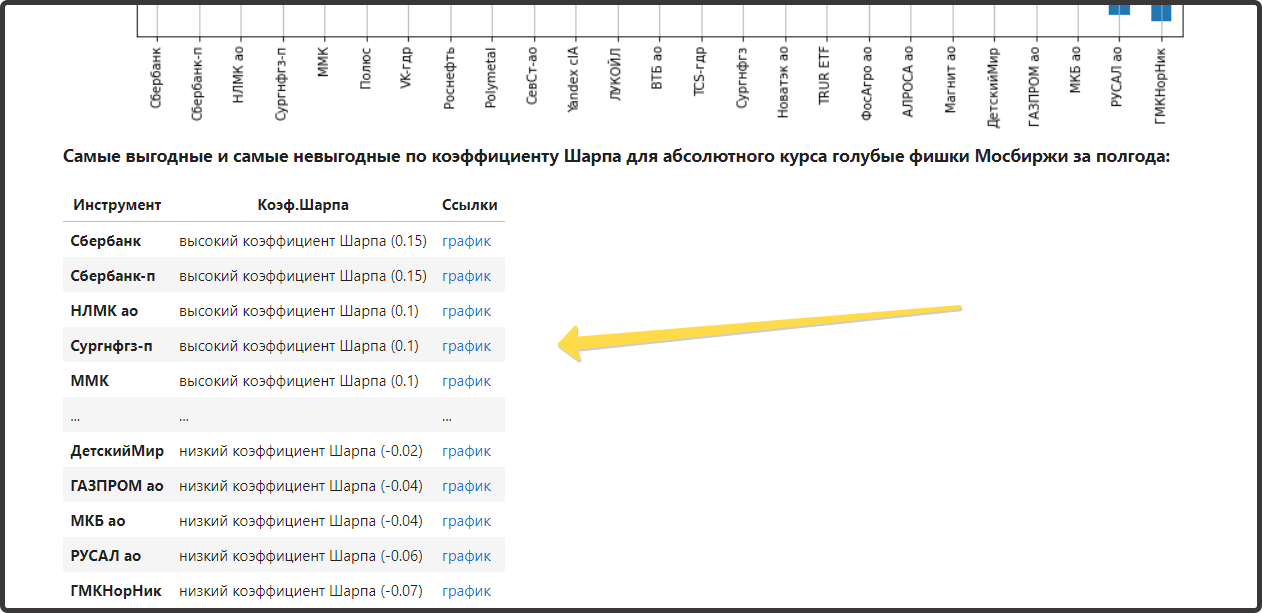

Ниже таблицы, вы также найдете ссылки на разделы проекта, соответствующие выбранному временному промежутку. Это дает вам возможность получить более детальную информацию о голубых фишках Мосбиржи и их доходности на определенных временных интервалах.

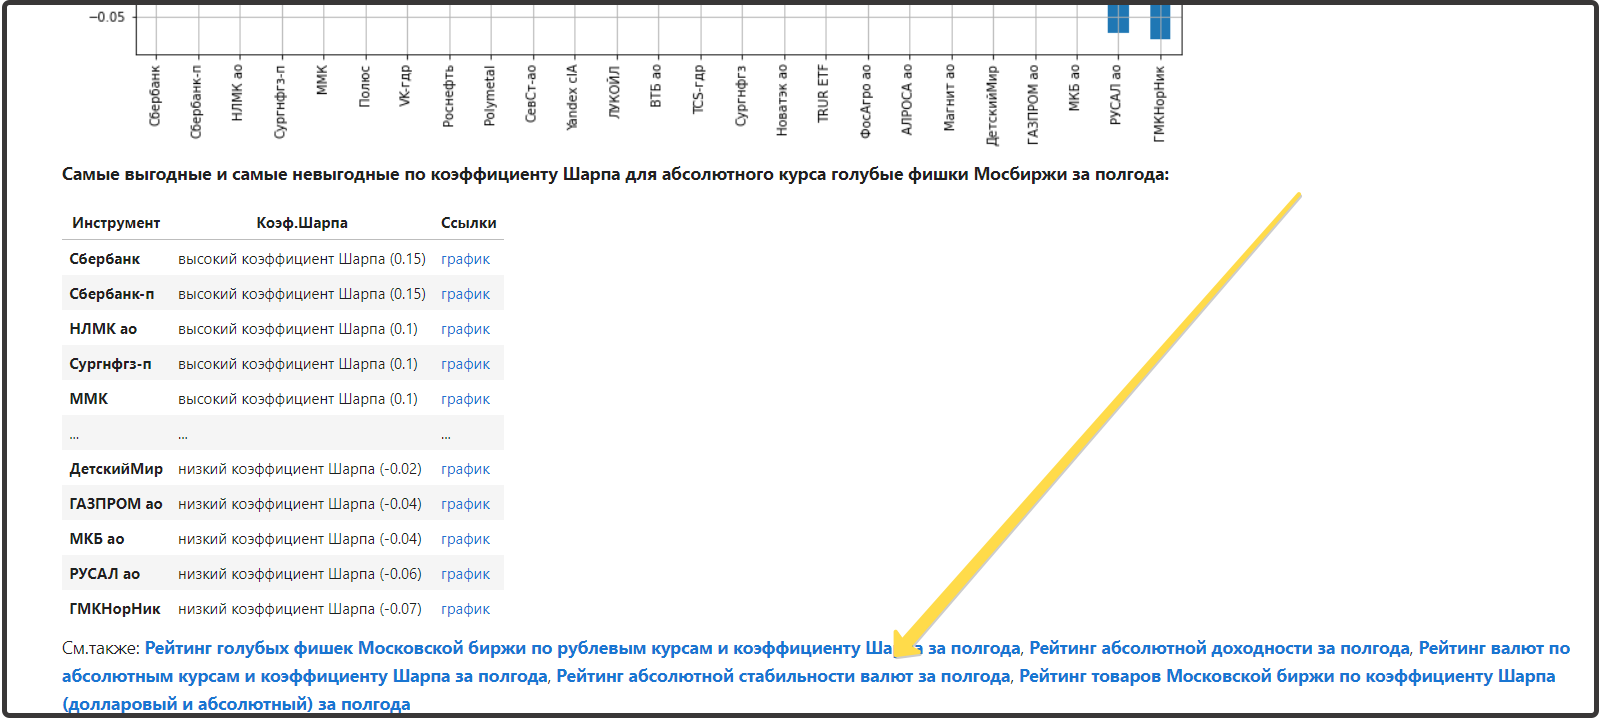

Для вашего удобства мы предоставляем правое боковое меню, которое позволяет вам перемещаться между различными бумагами и изучать их рейтинги и графики.

Мы надеемся, что эти улучшения сделают нашу страницу с рейтингами голубых фишек Московской биржи более информативной и полезной для ваших инвестиционных решений. Мы стремимся предоставить вам наиболее точную и актуальную информацию для помощи в принятии осознанных финансовых решений.

Если у вас возникнут вопросы или предложения, пожалуйста, свяжитесь с нами. Мы всегда готовы помочь и принять во внимание вашу обратную связь.

In [ ]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
import abscur_menu
import abscur_post as ap

# меню проекта печатаем
abscur_menu.print_menu()

# абсолютные курсы акций подкачиваем
s_abs = pd.read_csv("/kaggle/input/mmvb-abscur-blue-fishki/s_abscur.csv",index_col=0,parse_dates=['Date'])

# # расчет коэффициента Шарпа
# def sharpe_ratio(return_series, N=255, rf=0.01):
#     mean = return_series.mean() * N -rf
#     sigma = return_series.std() * np.sqrt(N)
#     return mean / sigma

def elem_quant_text(elems,elem,texts):
    if np.isnan(elem):
        elem = 0
    _end = "(" + str(np.round(elem*100,2)) + "%)"
    
    q_cnt = len(texts)
    
    for n in range(q_cnt):
        if elem <= elems.quantile((n+1)/q_cnt):
            return texts[q_cnt-n-1] + " " + _end

diap = [[30,"месяц"],[92,"квартал"],[182,"полгода"],[365,"год"],[2*365,"2 года"],[3*365,"3 года"],[5*365,"5 лет"]]

cnt = 0
texts = []
comments = []

for per,title_per in diap:
    display(Markdown("# За "+title_per))
    
    date_start = s_abs.asfreq(freq="D").index[-per]
    date_finish = s_abs.index[-1]
    
    sharp_texts = "высокий коэффициент Шарпа\tсредний коэффициент Шарпа\tнизкий коэффициент Шарпа".split("\t")
    res = (s_abs[s_abs.index >= date_start] / s_abs[s_abs.index >= date_start].median()).pct_change()
    res = res.mean()/res.std()
    
#     res = sharpe_ratio(s_abs[s_abs.index >= date_start].pct_change())
    res.sort_values(ascending=False,inplace=True)
    text = "Рейтинг акций по коэффициенту Шарпа для абсолютных курсов за "+title_per+" c "+datetime.datetime.strftime(date_start,"%Y-%m-%d")+" по "+datetime.datetime.strftime(date_finish,"%Y-%m-%d")
    res.plot.bar(grid=True,title=text,ylabel="коэффициент Шарпа",legend=False,figsize=(15,5))
    texts.append(text)
    plt.savefig(str(cnt)+".png")
    plt.show()
    cnt += 1
    
    comment = "Самые выгодные для вложений бумаги по абсолютному коэффициенту Шарпа: "
    text = "**Самые выгодные и самые невыгодные по коэффициенту Шарпа для абсолютного курса голубые фишки Мосбиржи за " + title_per + ":**\n\n"
    text += "|Инструмент|Коэф.Шарпа|Ссылки|\n"
    text += "|-|-|-|\n"
    for n in range(5):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + elem_quant_text(elems=res/100,elem=res[ticker]/100,texts=sharp_texts).replace('%','') + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#" + ticker.replace(" ","-") + ")|\n"
        comment += f", \"{ticker}\" ({elem_quant_text(elems=res/100,elem=res[ticker]/100,texts=sharp_texts).replace('%','')})"
    comment += "\nСамые невыгодные для вложений бумаги по абсолютному коэффициенту Шарпа: "
    text += "|...|...|...|\n"
    for n in range(len(res.index)-5,len(res.index)):
        ticker = res.index[n]
        text += "|**" + ticker + "**|" + elem_quant_text(elems=res/100,elem=res[ticker]/100,texts=sharp_texts).replace('%','') + "|[график](https://www.kaggle.com/code/eavprog/mmvb-abscur-blue-fishki#" + ticker.replace(" ","-") + ")|\n"
        comment += f", \"{ticker}\" ({elem_quant_text(elems=res/100,elem=res[ticker]/100,texts=sharp_texts).replace('%','')})"
    display(Markdown(text))
    comments.append(comment.replace(": ,",":").replace("))",")"))
    
    text = "См.также: "
    text += "[**Рейтинг голубых фишек Московской биржи по рублевым курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp-rub/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной доходности за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reyting-dohod/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг валют по абсолютным курсам и коэффициенту Шарпа за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг абсолютной стабильности валют за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-reit-stabil/notebook#За-" + title_per.replace(" ","-") + ")"
    text += ", "
    text += "[**Рейтинг товаров Московской биржи по коэффициенту Шарпа (долларовый и абсолютный) за " + title_per + "**](https://www.kaggle.com/code/eavprog/abscur-tovar-sharp/notebook#За-" + title_per.replace(" ","-") + ")"
    display(Markdown(text))
    
#     break
    
num = np.random.randint(cnt)
ap.send_img_and_text(str(num)+".png",texts[num] + "\n\n" + comments[num] + "\n---\nИсточник - https://www.kaggle.com/code/eavprog/abscur-bluefish-sharp")